# from fastai books

## import

In [1]:
from fastai.tabular.all import *

In [2]:
%matplotlib inline

# fastai v1 backward compatibility
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

## hands on tensors

In [3]:
data = [[1,2,3], [4,5,6]]

In [4]:
arr = array(data)

In [5]:
type(arr)

numpy.ndarray

In [6]:
tns = tensor(data)

In [7]:
type(tns)

torch.Tensor

In [8]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
tns.type()

'torch.LongTensor'

## gradient descent

In [10]:
def f(x):
    return torch.sin(x)

In [11]:
n=100
x = torch.ones(n,1) 
x[:,0].uniform_(-3.14,3.14)
x[:5]

tensor([[-1.2185],
        [ 0.3827],
        [-1.6390],
        [-1.7380],
        [-0.1078]])

In [12]:
y=f(x)


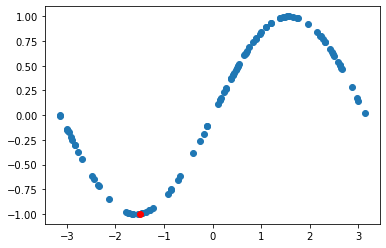

In [13]:
plt.scatter(x[:,0], y)
plt.scatter(tensor(-1.5), f(tensor(-1.5)), color='red')

In [14]:
xt = tensor(1.5).requires_grad_()

In [15]:
yt = f(xt)

In [16]:
yt

tensor(0.9975, grad_fn=<SinBackward>)

In [17]:
yt.backward()

In [18]:
xt.grad

tensor(0.0707)

In [19]:
torch.cos(xt)

tensor(0.0707, grad_fn=<CosBackward>)

In [20]:
torch.randn(3)

tensor([-0.0640,  0.2819,  0.4030])

## end-to-end SGD

In [47]:
time = torch.arange(20).float();time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

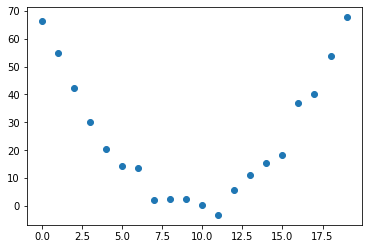

In [48]:
speed = torch.randn(20)*3+0.75*(time-9.5)**2+1
plt.scatter(time, speed)

We try to find a function `a*(time**2)+b*time+c` to approximate this function

In [49]:
def f(t, params):
    a,b,c = params
    return a*(t**2)+b*t+c

In [50]:
def mse(pred, targets):
    return ((preds-targets)**2).mean()

### step 1: initialize parameters

In [51]:
params = torch.randn(3).requires_grad_()

In [52]:
params


tensor([-0.2515, -1.7025, -0.4832], requires_grad=True)

### step 2: calculate the predictions

In [53]:
preds = f(time, params)

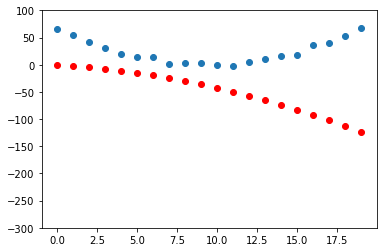

In [54]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds)

### step 3: calculate the loss

In [55]:
loss = mse(preds, speed)
loss

tensor(7540.1147, grad_fn=<MeanBackward0>)

### step 4: calculate the gradients

In [56]:
loss.backward()
params.grad


tensor([-27876.4355,  -1810.2639,   -145.0170])

In [57]:
params.grad*1e-5

tensor([-0.2788, -0.0181, -0.0015])

In [58]:
params

tensor([-0.2515, -1.7025, -0.4832], requires_grad=True)

### step 5: step the weights

In [59]:
lr=1e-5
params.data -= lr * params.grad.data
params.grad=None

In [60]:
preds=f(time, params)
mse(preds, speed)

tensor(1940.7621, grad_fn=<MeanBackward0>)

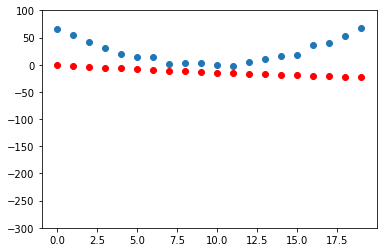

In [61]:
show_preds(preds)

In [62]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

### step 6: repeat the process

In [63]:
for i in range(10): apply_step(params)

1940.7620849609375


RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [ ]:
params = torch.randn(3).requires_grad_()
params

In [ ]:
for i in range(10):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad=None
    print(loss.item())
    preds

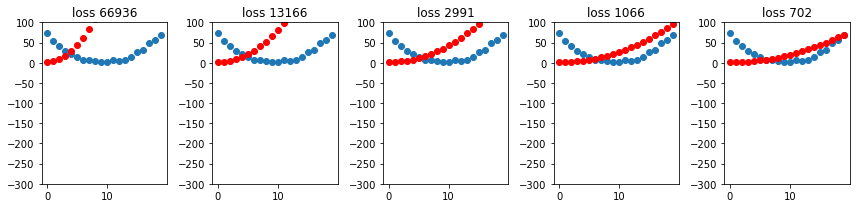

In [54]:
#number of iterations
n = 5

params = torch.randn(3).requires_grad_()

_,axs=plt.subplots(1,n,figsize=(12,3))
for ax in axs:
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad=None
#     print(loss.item())
    ax.set_title('loss '+str(round(loss.item())))
    show_preds(preds, ax)
plt.tight_layout()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

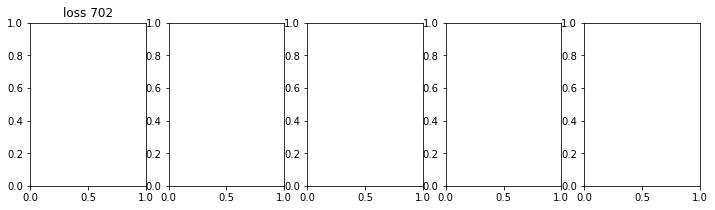

In [55]:
#number of iterations
n = 5

params = torch.randn(3).requires_grad_()

_,axs=plt.subplots(1,n,figsize=(12,3))
for ax in axs:
    ax.set_title('loss '+str(round(loss.item())))
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

# from fastai book


In [88]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

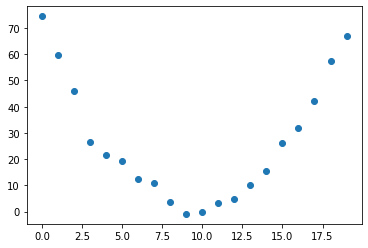

In [89]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [90]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [91]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [92]:
params = torch.randn(3).requires_grad_()

In [93]:
#hide
orig_params = params.clone()

In [94]:
preds = f(time, params)

In [95]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

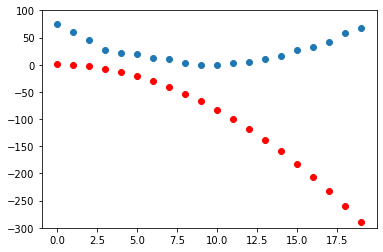

In [96]:
show_preds(preds)

In [97]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [98]:
loss.backward()
params.grad

tensor([-53195.8594,  -3419.7146,   -253.8908])

In [99]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [100]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [101]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [102]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5366, grad_fn=<MeanBackward0>)

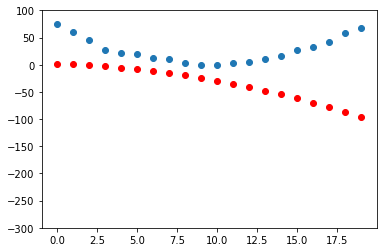

In [103]:
show_preds(preds)

In [104]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [105]:
for i in range(10): apply_step(params)

5435.53662109375
1577.4495849609375
847.3780517578125
709.22265625
683.0757446289062
678.12451171875
677.1839599609375
677.0025024414062
676.96435546875
676.9537353515625


In [106]:
#hide
params = orig_params.detach().requires_grad_()

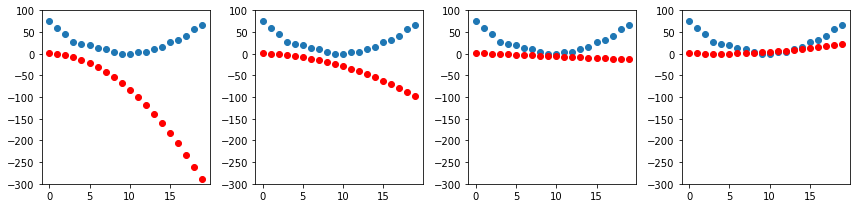

In [107]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

# to be applied on my own dataset: sin+rand

x.shape torch.Size([100, 1])
x.shape torch.Size([1])


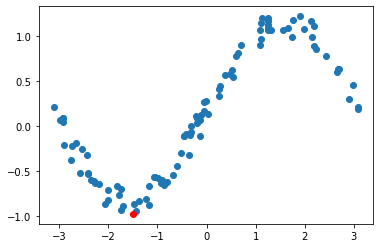

In [3]:
def my_f(x):
    print('x.shape', x.shape)
    return torch.sin(x)+torch.rand(x.shape)/3

n=100
time = torch.ones(n,1) 
time[:,0].uniform_(-3.14,3.14)

speed=my_f(time)


plt.scatter(time[:,0], speed)
plt.scatter(tensor(-1.5), my_f(tensor([-1.5])), color='red')

In [4]:
def f(t, params):
    a,b,c,d = params
    return a*(t**3) + (b*t**2) + c*t + d

In [5]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [6]:
params = torch.randn(4).requires_grad_()

In [7]:
#hide
orig_params = params.clone()

In [8]:
preds = f(time, params)

In [9]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-3,2)

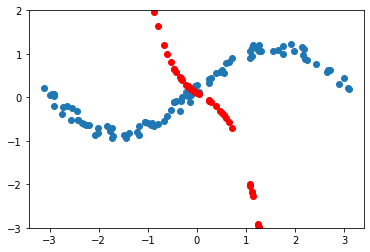

In [10]:
show_preds(preds)

In [11]:
loss = mse(preds, speed)
loss

tensor(330.6857, grad_fn=<MeanBackward0>)

In [12]:
loss.backward()
params.grad

tensor([-415.4212,   47.6212,  -59.5242,    6.9952])

In [13]:
params.grad * 1e-5

tensor([-4.1542e-03,  4.7621e-04, -5.9524e-04,  6.9952e-05])

In [14]:
params

tensor([-1.4162,  0.3942, -0.7185,  0.1002], requires_grad=True)

In [15]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [16]:
preds = f(time,params)
mse(preds, speed)

tensor(328.9039, grad_fn=<MeanBackward0>)

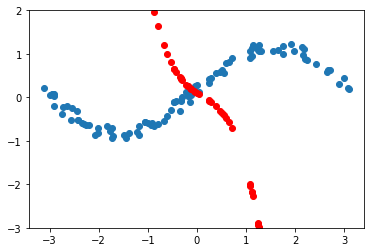

In [17]:
show_preds(preds)

In [18]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [19]:
for i in range(100000): apply_step(params, prn=False)

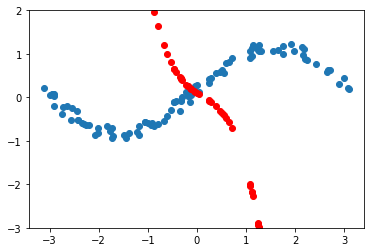

In [20]:
show_preds(preds)

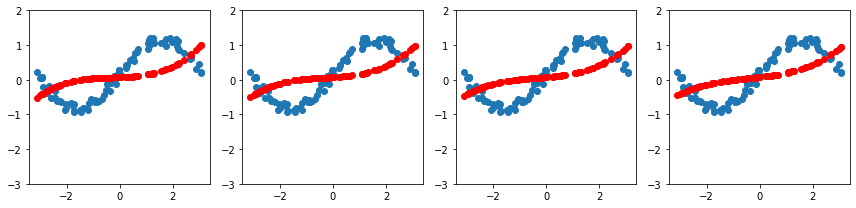

In [61]:
#hide
params = orig_params.detach().requires_grad_()
_,axs = plt.subplots(1,4,figsize=(12,3))
max_iter = 10000
for i in range(max_iter): 
    preds=apply_step(params, prn=False)
    if (i % (max_iter // 4) == 0): 
        show_preds(preds, axs[i // (max_iter //4)])
# for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

ok it is not really impressive to estimate sin with a deg3 polynomial function.

Maybe we can give an hidden function as a polynomial and see how to estimate it

# polynomial

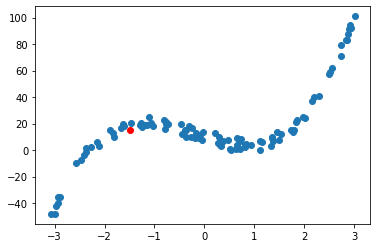

In [116]:
def my_hidden_f(x):
    return 4*x**3+2*x**2-12*x+5+10*torch.rand(x.shape)

n=100
time = torch.ones(n,1) 
time[:,0].uniform_(-3.14,3.14)

speed=my_hidden_f(time)


plt.scatter(time[:,0], speed)
plt.scatter(tensor(-1.5), my_hidden_f(tensor([-1.5])), color='red')

In [117]:
def f(t, params):
    a,b,c,d = params
    return a*(t**3) + (b*t**2) + c*t + d

In [118]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [119]:
params = torch.randn(4).requires_grad_()

In [120]:
#hide
orig_params = params.clone()

In [121]:
preds = f(time, params)

In [122]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-50,150)

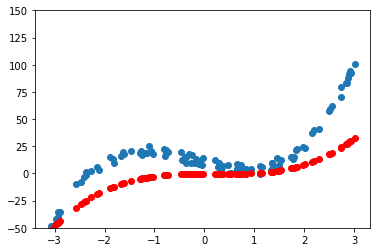

In [123]:
show_preds(preds)

In [124]:
loss = mse(preds, speed)
loss

tensor(607.8982, grad_fn=<MeanBackward0>)

In [125]:
loss.backward()
params.grad

tensor([-237.0573, -165.2373,  -22.7137,  -37.7739])

In [126]:
params.grad * 1e-5

tensor([-0.0024, -0.0017, -0.0002, -0.0004])

In [127]:
params

tensor([ 1.5048, -0.8469, -0.0918, -0.4597], requires_grad=True)

In [128]:
lr = 1e-4
params.data -= lr * params.grad.data
params.grad = None

In [129]:
preds = f(time,params)
mse(preds, speed)

tensor(599.4329, grad_fn=<MeanBackward0>)

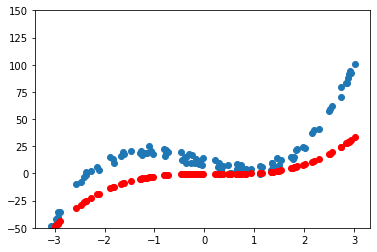

In [130]:
show_preds(preds)

In [131]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [132]:
for i in range(100000): apply_step(params, prn=False)

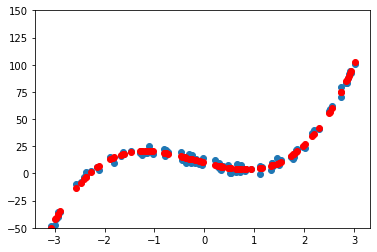

In [133]:
preds=apply_step(params, prn=False)
show_preds(preds)

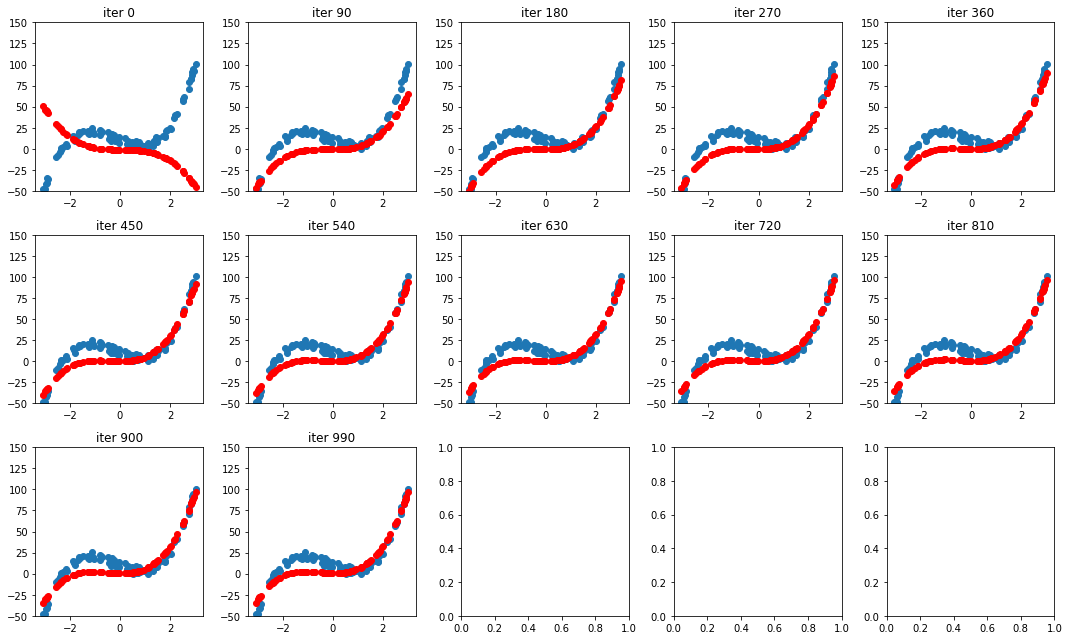

In [296]:
#hide

#load initial parameters
params = torch.randn(4).requires_grad_()
#nbr of iterations
max_iter = 1000
#nbr of curves visible
nbr_graph = 12
#max number of curves on one row
max_columns = 5
max_rows = (nbr_graph-1) // max_columns + 1


_,axs = plt.subplots(nrows=max_rows,ncols=max_columns,figsize=(3*max_columns,3*max_rows))

ax_index = 0,0
if (max_rows ==1): ax_index=0
show_preds(apply_step(params, prn=False), axs[ax_index])
axs[ax_index].set_title('iter 0')
for i in range(max_iter): 
    preds=apply_step(params, prn=False)
    if ((i+1) % (max_iter // (nbr_graph-1)) == 0): 
        graph_iteration = max_iter //(nbr_graph-1)
        ax_index= ((i+1) // graph_iteration ) // (max_columns),  ((i+1) // graph_iteration ) % (max_columns)
        if (max_rows ==1): ax_index= ((i+1) // graph_iteration ) % (max_columns)
        show_preds(preds, axs[ax_index])
#         print('iteration ', i+1, ' ax_index ', ax_index)
        axs[ax_index].set_title('iter '+str(i+1))
plt.tight_layout()